In [1]:
import pandas as pd
df=pd.read_csv("breast-cancer.data",header=None, na_values="?")
"""print(df.isna().sum())
for i in range(0,10):
    print(df[i].unique())"""
from sklearn.impute import SimpleImputer
df_i=pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df))
print(df_i.isna().sum())
from sklearn.preprocessing import LabelEncoder
for i in [0,1,2,3,4,5,7,8,9]:
    df_i[i]=LabelEncoder().fit_transform(df_i[i])
print(df_i.head())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64
   0  1  2  3  4  5  6  7  8  9
0  0  1  2  5  0  0  3  0  1  0
1  0  2  2  3  0  0  2  1  4  0
2  0  2  2  3  0  0  2  0  1  0
3  0  4  0  2  0  0  2  1  2  0
4  0  2  2  0  0  0  2  1  3  0


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,ytrain,ytest=train_test_split(df_i.drop(columns=[0]),df_i[0],test_size=0.3)
print(x_train.shape,x_test.shape,ytrain.shape,ytest.shape)

(200, 9) (86, 9) (200,) (86,)


In [2]:
from sklearn.tree import DecisionTreeClassifier


In [12]:
model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model_dt.fit(x_train,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [14]:
pred_train=model_dt.predict(x_train)
pred_test=model_dt.predict(x_test)
from sklearn.metrics import accuracy_score
print("training Accuracy is ",accuracy_score(ytrain,pred_train))
print("testing accuracy is ",accuracy_score(ytest,pred_test))

training Accuracy is  0.755
testing accuracy is  0.7674418604651163


[Text(167.4, 181.2, 'X[5] <= 2.5\nentropy = 0.899\nsamples = 200\nvalue = [137, 63]'),
 Text(83.7, 108.72, 'X[2] <= 2.5\nentropy = 0.707\nsamples = 135\nvalue = [109, 26]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.276\nsamples = 42\nvalue = [40, 2]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.824\nsamples = 93\nvalue = [69, 24]'),
 Text(251.10000000000002, 108.72, 'X[4] <= 0.5\nentropy = 0.986\nsamples = 65\nvalue = [28, 37]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.99\nsamples = 43\nvalue = [24, 19]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.684\nsamples = 22\nvalue = [4, 18]')]

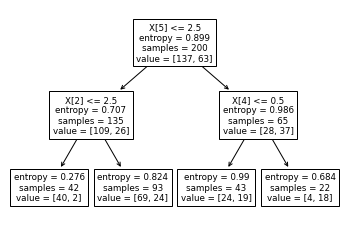

In [15]:
from sklearn.tree import plot_tree
plot_tree(model_dt)

In [23]:
from sklearn.svm import SVC
model_s=SVC(kernel='poly')

In [24]:
model_s.fit(x_train,ytrain)

SVC(kernel='poly')

In [25]:
pred_train=model_s.predict(x_train)
pred_test=model_s.predict(x_test)
from sklearn.metrics import accuracy_score
print("training Accuracy is ",accuracy_score(ytrain,pred_train))
print("testing accuracy is ",accuracy_score(ytest,pred_test))

training Accuracy is  0.805
testing accuracy is  0.7558139534883721
